<a href="https://colab.research.google.com/github/raphaelfontenelle/Artificial-Inteligence-Algorithm/blob/main/A_Search_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##A* search: Minimizing the total estimated solution cost


The most widely known form of best-first search is called A* search (pronounced “A-star ∗ SEARCH
search”). It evaluates nodes by combining g(n), the cost to reach the node, and h(n), the cost
to get from the node to the goal:
f(n) = g(n) + h(n) .
Since g(n) gives the path cost from the start node to node n, and h(n) is the estimated cost
of the cheapest path from n to the goal, we have
f(n) = estimated cost of the cheapest solution through n .
Thus, if we are trying to find the cheapest solution, a reasonable thing to try first is the
node with the lowest value of g(n) + h(n). It turns out that this strategy is more than just
reasonable: provided that the heuristic function h(n) satisfies certain conditions, A∗ search is
both complete and optimal. The algorithm is identical to UNIFORM-COST-SEARCH except
that A∗ uses g + h instead of g.

A* Algorithm

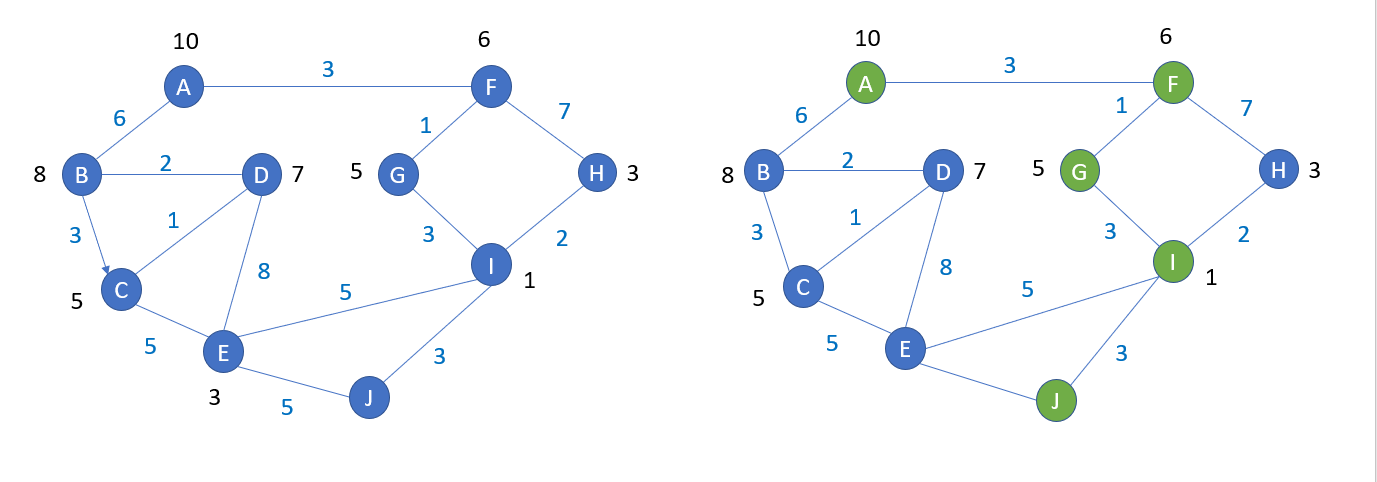

In [ ]:
Graph_nodes= {'A':[('B',6), ('F',3)],
        'B':[('C',3), ('D',2)],
        'C':[('E',5), ('D',1), ('B', 3)],
        'D':[('E',8), ('C', 1), ('B', 2)],
        'E':[('J',5), ('D', 8), ('C', 1), ('I', 5)],
        'F':[('G',1), ('H',7), ('A', 3)],
        'G':[('I',3), ('F', 1)],
        'H':[('I',2), ('F', 7)],
        'I':[('E',5), ('J',3), ('G', 5), ('H', 2)],
        'J':None}

def heuristic(n):
  H_dist = {
         'A':10,
         'B':8,
         'C':5,
         'D':7,
         'E':3,
         'F':6,
         'G':5,
         'H':3,
         'I':1,
         'J':0} 
  return H_dist[n]

In [ ]:
def aStarAlgo(start_node, stop_node):
         
        open_set = set(start_node) 
        closed_set = set()
        g = {} #store distance from starting node
        parents = {}# parents contains an adjacency map of all nodes
 
        #ditance of starting node from itself is zero
        g[start_node] = 0
        #start_node is root node i.e it has no parent nodes
        #so start_node is set to its own parent node
        parents[start_node] = start_node
         
         
        while len(open_set) > 0:
            n = None
 
            #node with lowest f() is found
            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v
             
                     
            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    #nodes 'm' not in first and last set are added to first
                    #n is set its parent
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                         
     
                    #for each node m,compare its distance from start i.e g(m) to the
                    #from start through n node
                    else:
                        if g[m] > g[n] + weight:
                            #update g(m)
                            g[m] = g[n] + weight
                            #change parent of m to n
                            parents[m] = n
                             
                            #if m in closed set,remove and add to open
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                path = []
 
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
 
                path.append(start_node)
 
                path.reverse()
 
                print('Path found: {}'.format(path))
                return path
 
 
            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_set.remove(n)
            closed_set.add(n)
 
        print('Path does not exist!')
        return None
         
#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

In [ ]:
aStarAlgo('A', 'J')

Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

Example II

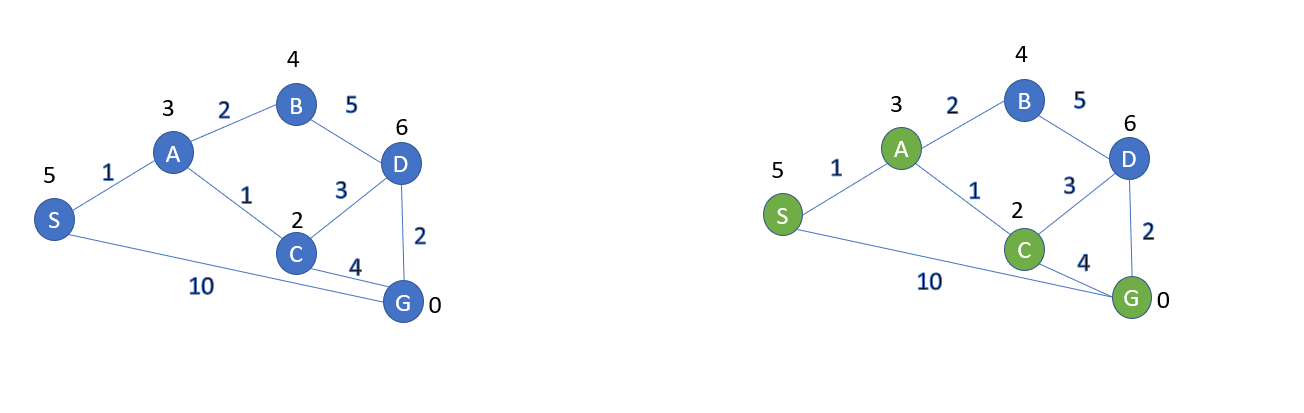

In [ ]:
Graph_nodes= {
        'S':[('A',1), ('G',10)],
        'A':[('B',2), ('C',1), ('S', 1)],
        'B':[('D',5), ('A', 2)],
        'C':[('D',3), ('G',4), ('A', 1)],
        'D':[('G',2),('C', 3),('B',5)],
        'G':None
        }

def heuristic(n):
  H_dist = {
         'S':5,
         'A':3,
         'B':4,
         'C':2,
         'D':6,
         'G':0
         }
  return H_dist[n]



In [ ]:
aStarAlgo('S', 'G')

Path found: ['S', 'A', 'C', 'G']


['S', 'A', 'C', 'G']

##Solving a maze problem:

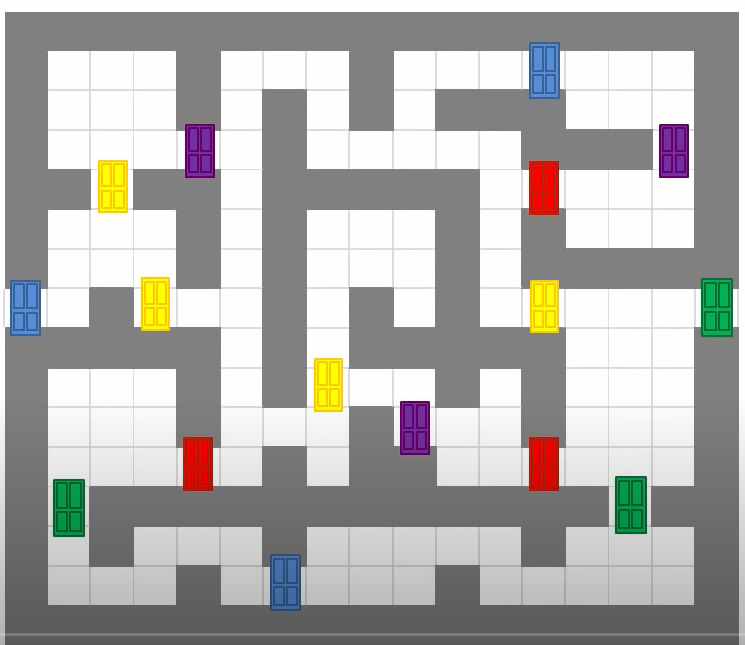

Create a grath:

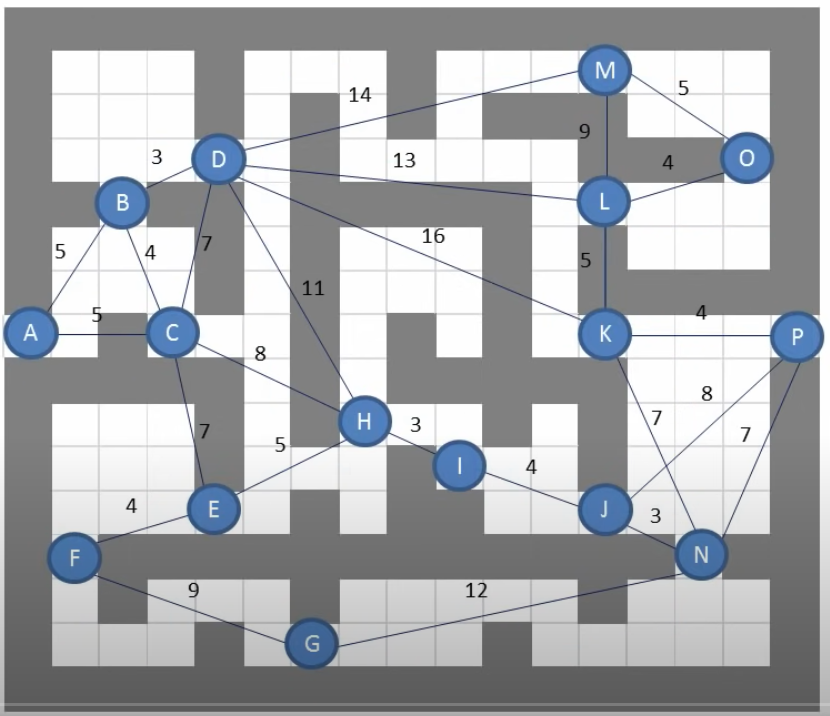

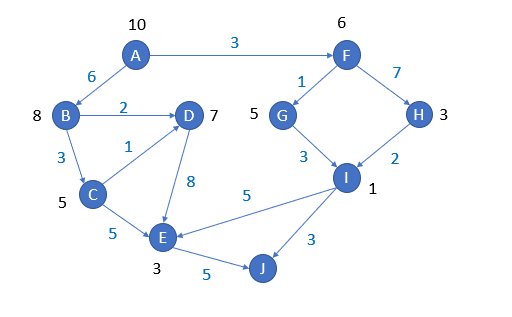

##Manhattan distance



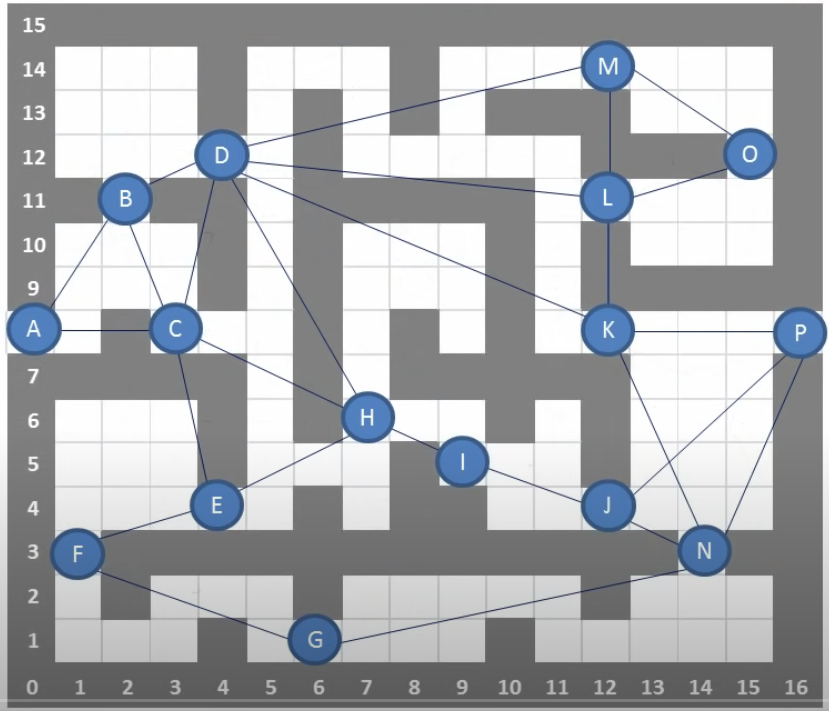

In [ ]:
Graph_nodes= {
        'A':[('B',5), ('C',5)],
        'B':[('C',4), ('D',7), ('A',5)],
        'D':[('M',14), ('L',13), ('K', 16), ('H', 11), ('C', 7)],
        'C':[('D',7), ('E',7), ('H', 8), ('A', 5)],
        'E':[('F',4), ('H', 5), ('C', 7)],
        'F':[('E', 4), ('G', 9)],
        'G':[('N', 12)],
        'H':[('D', 11), ('C', 8), ('E', 5), ('I', 3)],
        'I':[('H', 3), ('J', 4)],
        'J':[('I', 4), ('P', 8), ('N', 3)],
        'N':[('P', 7), ('J', 3)],
        'K':[('P', 4), ('L', 5), ('D', 16)],
        'L':[('D', 13), ('O', 4), ('M', 9), ('K', 5)],
        'O':[('L', 4), ('M', 5)],
        'M':[('D', 14), ('L', 9), ('O', 5)],
        'P':None
        }

def heuristic(n):
  H_dist = {
         'A':16,
         'B':17,
         'C':13,
         'D':16,
         'E':16,
         'F':20,
         'G':17,
         'H':11,
         'I':10,
         'J':8,
         'K':4,
         'L':7,
         'M':10,
         'N':7,
         'O':5,
         'P':0
         }
  return H_dist[n]

In [ ]:
aStarAlgo('A', 'P')

Path found: ['A', 'C', 'H', 'I', 'J', 'P']


['A', 'C', 'H', 'I', 'J', 'P']

Reference: 



*   Artificial Intelligence - A Modern Approach Third Edition

*   https://www.mygreatlearning.com/blog/a-search-algorithm-in-artificial-intelligence/

*   https://www.youtube.com/watch?v=eSOJ3ARN5FM


